## Contents 

01. Customer Profile 1: Single young adults vs married adults
02. Customer Profile 2: Adults with dependants ve adults without dependants 


In [1]:
#import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data

path = r'/Users/lindazhang/Instacart Basket Analysis'
high_activity_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_high_activity_customers.pkl'))


## Customer Profiling

### Profile 1: 

Married adult: married, adult, 1+ dependants 

Single young adult: single, young adult, no dependants


In [3]:
# Create a flag for married adults/single young adults
high_activity_customers.loc[(high_activity_customers['age_bracket'] == 'Young adult' ) & (high_activity_customers['n_dependants'] == 0) & (high_activity_customers['fam_status'] == 'single'), 'profile'] = 'single young adult'
high_activity_customers.loc[(high_activity_customers['age_bracket'] == 'Adult' ) & (high_activity_customers['n_dependants'] > 0) & (high_activity_customers['fam_status'] == 'married'), 'profile'] = 'married adult'

In [4]:
# checking counts of customer profiles

high_activity_customers['profile'].value_counts()

married adult         13778022
single young adult     1070158
Name: profile, dtype: int64

In [5]:
# checking how many customers are not married adults or single young adults

high_activity_customers.isnull().sum()

order_id                                0
customer_id                             0
order_number                            0
orders_day_of_week                      0
order_hour_of_day                       0
days_since_prior_order            1662805
product_id                              0
product_name                            0
department_id                           0
prices                                  0
price_range                             0
busiest_day                             0
busiest_days                            0
period_of_day                           0
busiest_periods                         0
max_order                               0
loyalty_flag                            0
mean_spend                              0
spend_flag                              0
median_days_since_prior_order           0
customer_frequency                      0
Gender                                  0
STATE                                   0
Age                               

In [6]:
# getting the median_days_since_prior_order for single young adults versus married adults

profile_median_days_since_prior_order = high_activity_customers.groupby('profile').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})
profile_median_days_since_prior_order

median_days_since_prior_order           
                                            mean  min   max
profile                                                    
married adult                           9.995773  0.0  30.0
single young adult                     10.186044  0.0  30.0

In [7]:
profile_median_days_since_prior_order.to_clipboard()

In [8]:
# getting the mean price spent on orders for single young adults versus married adults

profile_prices = high_activity_customers.groupby('profile').agg({'prices': ['mean', 'min', 'max']})
profile_prices

prices              
                         mean  min      max
profile                                    
married adult       11.973203  1.0  99999.0
single young adult  13.093726  1.0  99999.0

In [9]:
profile_prices.to_clipboard()

In [10]:
# getting the regional counts of orders by single young adults versus married adults

profile_region_crosstab = pd.crosstab(high_activity_customers['profile'], high_activity_customers['region'], dropna = False)
profile_region_crosstab

region,Midwest,Northeast,South,West
profile,,,,
married adult,3242220,2436549,4565660,3533593
single young adult,238637,194109,373699,263713


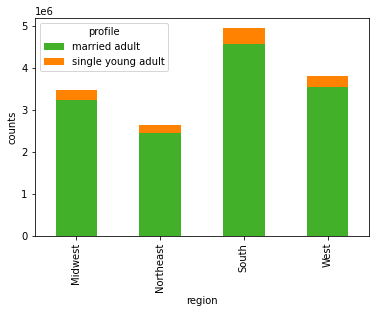

In [11]:
# making a stacked bar graph of region counts of orders by single adults versus married adults

profile_region_bar= high_activity_customers.groupby('region')['profile'].value_counts().sort_values(ascending=False).unstack().plot.bar(
    stacked=True,ylabel='counts',color=['#43b02a','#ff8200'])

In [12]:
profile_region_bar. figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_profile_region.png'))

In [13]:
# getting the order counts by department for single adults versus married adults

profile_department_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['profile'], dropna = False)
profile_department_crosstab

profile,married adult,single young adult
department,,
alcohol,63625,5070
babies,182764,14831
bakery,498555,38866
beverages,1142025,89809
breakfast,301258,23117
bulk,14907,1138
canned goods,450297,34824
dairy eggs,2305820,177811
deli,444090,34511


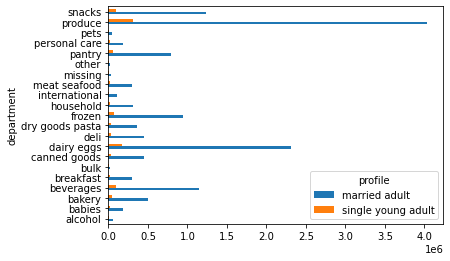

In [14]:
# making a bar graph of order counts by department for single adults versus married adults

profile_department_bar = profile_department_crosstab.plot(kind='barh')


In [15]:
profile_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_department_bar.png'))

In [16]:
profile_department_crosstab.to_clipboard()

### Profile 2: 

Adult with no dependants (age = 27-64, n_dependants = 0)

Adult with dependants (age = 27 - 64, n_dependants = 1+)

In [17]:
# Create a flag for adults with dependants and without dependants
high_activity_customers.loc[(high_activity_customers['age_bracket'] == 'Adult' ) & (high_activity_customers['n_dependants'] == 0), 'profile_1'] = 'Adult, no dependants'
high_activity_customers.loc[(high_activity_customers['age_bracket'] == 'Adult' ) & (high_activity_customers['n_dependants'] > 0), 'profile_1'] = 'Adult, with dependants'

In [18]:
# checking counts of customer profiles

high_activity_customers['profile_1'].value_counts()

Adult, with dependants    13778022
Adult, no dependants       4652695
Name: profile_1, dtype: int64

In [19]:
# checking how many customers are not adults with or without dependants

high_activity_customers.isnull().sum()

order_id                                0
customer_id                             0
order_number                            0
orders_day_of_week                      0
order_hour_of_day                       0
days_since_prior_order            1662805
product_id                              0
product_name                            0
department_id                           0
prices                                  0
price_range                             0
busiest_day                             0
busiest_days                            0
period_of_day                           0
busiest_periods                         0
max_order                               0
loyalty_flag                            0
mean_spend                              0
spend_flag                              0
median_days_since_prior_order           0
customer_frequency                      0
Gender                                  0
STATE                                   0
Age                               

In [20]:
# getting the median_days_since_prior_order for adults with dependants and adults without dependants

profile_1_median_days_since_prior_order = high_activity_customers.groupby('profile_1').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})
profile_1_median_days_since_prior_order

median_days_since_prior_order           
                                                mean  min   max
profile_1                                                      
Adult, no dependants                        9.898238  0.0  30.0
Adult, with dependants                      9.995773  0.0  30.0

In [21]:
# getting the mean price spent on orders for adults with dependants and adults without dependants

profile_1_prices = high_activity_customers.groupby('profile_1').agg({'prices': ['mean', 'min', 'max']})
profile_1_prices

prices              
                             mean  min      max
profile_1                                      
Adult, no dependants    11.916794  1.0  99999.0
Adult, with dependants  11.973203  1.0  99999.0

In [22]:
# getting the regional counts of orders by adults with dependants and adults without dependants

profile_1_region_crosstab = pd.crosstab(high_activity_customers['profile_1'], high_activity_customers['region'], dropna = False)
profile_1_region_crosstab

region,Midwest,Northeast,South,West
profile_1,,,,
"Adult, no dependants",1115315,782436,1552284,1202660
"Adult, with dependants",3242220,2436549,4565660,3533593


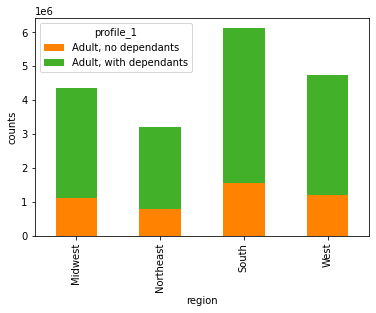

In [23]:
# making a stacked bar graph of region counts of orders by adults with dependants and adults without dependants

profile_1_region_bar= high_activity_customers.groupby('region')['profile_1'].value_counts().sort_values(ascending=False).unstack().plot.bar(
    stacked=True,ylabel='counts',color=['#ff8200','#43b02a',])

In [24]:
profile_1_region_bar. figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_profile_1_region.png'))

In [25]:
# getting the order counts by department for adults with dependants and adults without dependants

profile_1_department_crosstab = pd.crosstab(high_activity_customers['department'], high_activity_customers['profile_1'], dropna = False)
profile_1_department_crosstab

profile_1,"Adult, no dependants","Adult, with dependants"
department,,
alcohol,22618,63625
babies,62605,182764
bakery,170978,498555
beverages,386897,1142025
breakfast,102013,301258
bulk,4768,14907
canned goods,151453,450297
dairy eggs,780461,2305820
deli,153503,444090


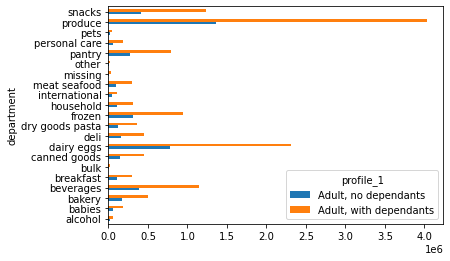

In [26]:
# making a bar graph of order counts by department for adults with dependants and adults without dependants
profile_1_department_bar = profile_1_department_crosstab.plot(kind='barh')

In [27]:
profile_1_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_1_department_bar.png'))

In [28]:
profile_1_department_crosstab.to_clipboard()